In [1]:
#1. Import thư viện cần thiết
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [50]:
#2. Đọc dữ liệu từ file
df = pd.read_csv('/content/SAMSUNG.csv')

In [51]:
#3. Làm sạch dữ liệu
df['Open'] = df['Open'].replace(0, df['Open'].mean())
df['High'] = df['High'].replace(0, df['High'].mean())
df['Low'] = df['Low'].replace(0, df['Low'].mean())
df['Close'] = df['Close'].replace(0, df['Close'].mean())
df

,Date,Close,Open,High,Low
0,3/4/2019,44850,46000,46100,44800
1,3/5/2019,44250,44600,45100,44150
2,3/6/2019,44000,44000,44300,43700
3,3/7/2019,44450,43400,44950,43400
4,3/8/2019,43800,44450,44800,43800
...,...,...,...,...,...
1542,5/21/2024,78400,78500,79000,78200
1543,5/22/2024,77700,78100,78700,77300
1544,5/23/2024,78300,77700,79100,77100
1545,5/24/2024,75900,76800,77000,75800


In [52]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Chọn features và target
X = df[['Open', 'High', 'Low']]
y = df['Close']

train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = model.predict(X_train)
predictions_xgb = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, predictions_xgb)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 375.1331527217742
Mean Squared Error (MSE): 250682.02510754985
R-squared (R2): 0.9859139868277428


**Dự đoán 30 ngày tiếp theo**

In [54]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

70474.17
4
1 day input [71500.       70100.       70474.171875]
1 day output [70310.875]
2 day input [70100.       70474.171875 70310.875   ]
2 day output [70223.21]
3 day input [70474.171875  70310.875     70223.2109375]
3 day output [70383.83]
4 day input [70310.875     70223.2109375 70383.828125 ]
4 day output [70198.61]
5 day input [70223.2109375 70383.828125  70198.609375 ]
5 day output [70314.49]
6 day input [70383.828125  70198.609375  70314.4921875]
6 day output [70065.234]
7 day input [70198.609375  70314.4921875 70065.234375 ]
7 day output [70185.24]
8 day input [70314.4921875 70065.234375  70185.2421875]
8 day output [70105.25]
9 day input [70065.234375  70185.2421875 70105.25     ]
9 day output [70129.84]
10 day input [70185.2421875 70105.25      70129.84375  ]
10 day output [70129.84]
11 day input [70105.25    70129.84375 70129.84375]
11 day output [70129.84]
12 day input [70129.84375 70129.84375 70129.84375]
12 day output [70129.84]
13 day input [70129.84375 70129.84375 7

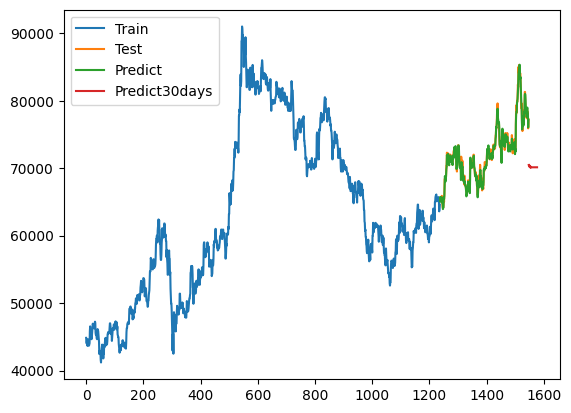

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()

**Dự đoán 60 ngày tiếp theo**

In [56]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[:3])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

70474.17
4
1 day input [70200 71500 70100]
1 day output [70474.17]
2 day input [71500.       70100.       70474.171875]
2 day output [70310.875]
3 day input [70100.       70474.171875 70474.171875]
3 day output [70229.055]
4 day input [70474.171875 70474.171875 70310.875   ]
4 day output [70383.83]
5 day input [70474.171875  70310.875     70229.0546875]
5 day output [70383.83]
6 day input [70310.875     70229.0546875 70383.828125 ]
6 day output [70198.61]
7 day input [70229.0546875 70383.828125  70383.828125 ]
7 day output [70223.21]
8 day input [70383.828125 70383.828125 70198.609375]
8 day output [70289.89]
9 day input [70383.828125  70198.609375  70223.2109375]
9 day output [70065.234]
10 day input [70198.609375  70223.2109375 70289.890625 ]
10 day output [70223.21]
11 day input [70223.2109375 70289.890625  70065.234375 ]
11 day output [70185.24]
12 day input [70289.890625  70065.234375  70223.2109375]
12 day output [70089.836]
13 day input [70065.234375  70223.2109375 70185.2421875

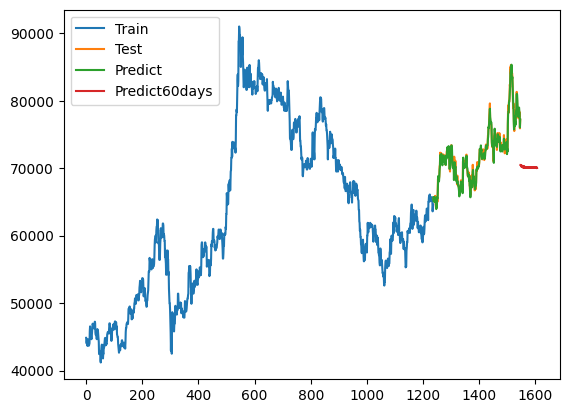

In [57]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

**Dự đoán 90 ngày tiếp theo**

In [58]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

70474.17
4
1 day input [71500.       70100.       70474.171875]
1 day output [70310.875]
2 day input [70100.       70474.171875 70310.875   ]
2 day output [70223.21]
3 day input [70474.171875  70310.875     70223.2109375]
3 day output [70383.83]
4 day input [70310.875     70223.2109375 70383.828125 ]
4 day output [70198.61]
5 day input [70223.2109375 70383.828125  70198.609375 ]
5 day output [70314.49]
6 day input [70383.828125  70198.609375  70314.4921875]
6 day output [70065.234]
7 day input [70198.609375  70314.4921875 70065.234375 ]
7 day output [70185.24]
8 day input [70314.4921875 70065.234375  70185.2421875]
8 day output [70105.25]
9 day input [70065.234375  70185.2421875 70105.25     ]
9 day output [70129.84]
10 day input [70185.2421875 70105.25      70129.84375  ]
10 day output [70129.84]
11 day input [70105.25    70129.84375 70129.84375]
11 day output [70129.84]
12 day input [70129.84375 70129.84375 70129.84375]
12 day output [70129.84]
13 day input [70129.84375 70129.84375 7

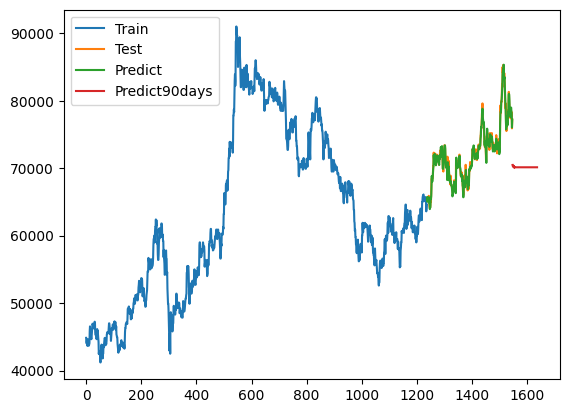

In [59]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()